# Python & Wearables

### FrOSCon 10, 22.08.2015, St. Augustin

### Python Devroom

## Andreas Schreiber
*Deutsches Zentrum für Luft- und Raumfahrt e.V.*

Twitter [@onyame](http://twitter.com/onyame)

Web [andreas-schreiber.net](http://andreas-schreiber.net)

Email [andreas.schreiber@dlr.de](andreas.schreiber@dlr.de)

## Alexander Nguyen
*Deutsches Zentrum für Luft- und Raumfahrt e.V.*

Twitter [@a8t5n](http://twitter.com/a8t5n)

Email [alex.nguyen@t-online.de](alex.nguyen@t-online.de)

## Simon Siegert
*Deutsches Zentrum für Luft- und Raumfahrt e.V.*

Email [simon.siegert@gmx.de](simon.siegert@gmx.de)

## Inhalt
* Wearables
* Wearables um uns herum...
* Fitbit Schrittzähler
* Vergleich zweier Schrittzähler
* Muse Headband EEG

## Wearables

![Seven of Nine](images/Seven-of-Nine-seven-of-nine-7503255-1200-1500.jpg)

### Wearables: Tragbare Computersysteme
* Am Körper befestigt
* Enthalten Sensoren
* Datenübertragung 


### Verwandte Technologien
* Ubiquitious Computing (allgegenwärtige Computer)
* Pervasive Computing und Internet of Things
* Mensch-Maschine-Interaktion


### Hörgerät

![Hörgerät](images/Ex-H%C3%B6rer-Ger%C3%A4t.jpg)

### Weitere Beispiele für Wearables
* Schrittzähler
* Pulsuhren
* Fitnessarmbänder
* Herzfrequenzmesser (Brustgurt)
* Stirnbänder (EEG)
* Smart Watches
* Smart Glasses
* Smart Clothing
* Smart Phones

## Wearables um uns herum... 

### Wearables in unserer Umgebung

#### Devices mit Bluetooth 
* Bluetooth Low Energy, Bluetooth LE, BLE

#### Smartphone als BLE Scanner
* Android App *RaMBLE - Bluetooth LE Mapper*
* [RaMBLE](https://play.google.com/store/apps/details?id=com.contextis.android.BLEScanner) (Google Play Store)


![RaMBLE Screenshot](images/RaMBLE-screenshot.png)

### RaMBLE

* RaMBLE bieter Export der Daten als SQLite-Datenbank
* Öffnen der Datenbank mit Python

In [2]:
import sqlite3
db = sqlite3.connect("btle_backup_20082015_2118.sqlite")

### Einlesen in ein Pandas DataFrame
* Python Data Analysis Library
* [pandas.pydata.org](http://pandas.pydata.org)

In [3]:
import pandas as pd

df = pd.read_sql("SELECT * from devices", db,index_col='id')

### BLE Devices als Tabelle

In [135]:
df.tail()

,address,addresstype,devicename,devicetype,firstseen,lastseen,scanresp,manufacturerspecificdatakey,manufacturerspecificdatafield,servicesuuid16,servicesuuid32,servicesuuid128,solicitedservicesuuid16,solicitedservicesuuid128,servicedata
id,,,,,,,,,,,,,,,
2854,EA:9B:4B:79:34:31,None,Surge,Fitbit Charge HR (from ServiceUUID),03/08/2015 16:41:38,03/08/2015 16:41:38,None,NaN,None,None,None,adabfb006e7d4601bda2bffaa68956ba,None,None,Device Information (180a): 1006c85903
2855,41:BC:CA:C5:16:35,None,None,Apple device (from MSData),03/08/2015 16:42:06,03/08/2015 16:42:06,None,76,05120000000000000000018ba83d040000000000,None,None,None,None,None,None
2856,DB:57:4F:AB:02:88,None,Charge HR,"Fitbit Charge HR (from device name), Fitbit Ch...",03/08/2015 16:42:51,03/08/2015 16:42:51,None,NaN,None,None,None,adabfb006e7d4601bda2bffaa68956ba,None,None,Device Information (180a): 1204c7410000
2857,7F:46:0C:BE:51:2B,None,None,Apple device (from MSData),03/08/2015 16:42:50,03/08/2015 16:42:50,None,76,0c0e002031fcf49234b7e4c1e62d157d,None,None,None,None,None,None
2858,7F:F4:93:34:A8:EE,None,None,Apple device (from MSData),03/08/2015 16:44:00,03/08/2015 16:44:00,None,76,0c0e00bca1894581f4345a1b722a5a9b,None,None,None,None,None,None


### Wir interessieren uns für die Device-Typen...

#### Ein wenig Data Cleaning
* Die überflüssigen Klammern mit Inhalt *"(from MSData)"* entfernen 

In [136]:
df['devicetype'] = df['devicetype'].str.replace('\(.*\)', '', case=False)

#### Gruppieren und zählen
* Pandas bietet eine sehr leistungsfähige Funktion zum Aggregieren von Daten: `groupby`

In [137]:
device_types = df.groupby('devicetype').size()

In [138]:
device_types

devicetype
Apple device              2077
Chipolo tracker              1
Ericsson device              2
Fitbit Charge               36
Fitbit Charge HR            78
Fitbit Flex                 49
Fitbit One                  63
Garmin Device               20
Garmin Vivosmart             3
Google device                1
HTC RECAM                    2
Jawbone UP24                17
Jawbone device               1
MI                          12
Misfit Wearables Corp       11
Nike device                 11
Nordic device                1
Parrot MINIKIT               1
Samsung device             137
Unknown 0x35EE device        6
Unknown device             307
Withings device             22
dtype: int64

### Darstellen als Bar Chart
* Plot mit Matplotlib
* Hübschere Farben mit seaborn (http://stanford.edu/~mwaskom/software/seaborn/index.html)

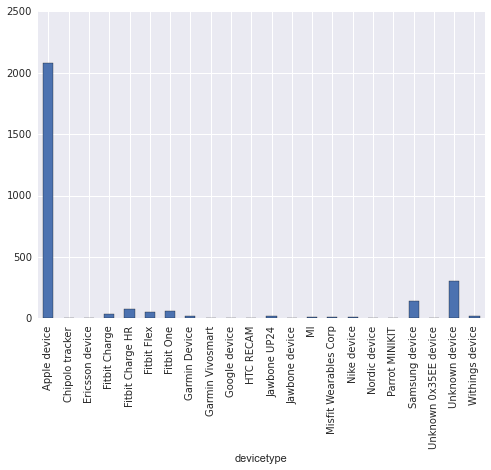

In [139]:
import seaborn as sns
device_types.plot(kind='bar')

### Übersichtlicher machen
* Wir entfernen einige Device-Typen
  * *'Apple device'*
  * *'Samsung device'*
  * *'Unknown device'*

In [140]:
devices = device_types.drop([u'Apple device ', u'Samsung device ', u'Unknown device'])

### Plot der restlichen Devices...

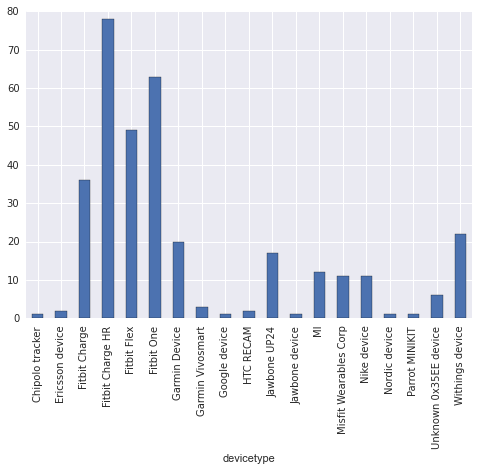

In [141]:
devices.plot(kind='bar')

## Fitbit Schrittzähler

### Fitbit 
* Activity tracker
  * Schritte
  * Stockwerke
  * Schlaf
* Verschiedene Modelle
  * Fitbit One
  * ...

![Fitbit Produkte](images/fitbit-products.png)

### Fitbit API
* Developer Website https://dev.fitbit.com
* Für einen API Key muss man seine App registrieren:
![](images/screenshot-dev fitbit com 2015-08-21 11-19-02.png)



### Client Keys und OAuth Credentials
![Fitbit OAuth](images/screenshot-dev-fitbit-com-2015-08-21-11-20-00.png)

### Best Practice: Keys und Credentials in Python

In [3]:
import fitbit_user

#### fitbit_user.py

```
user_id = '2****M'
access_token_secret = '7******************************9'
access_token = 'b******************************0'
consumer_key_steps = 'd******************************0'
consumer_secret_steps = '5******************************2'
```

### Python-Package für das Fitbit API
* Package `python-fitbit`: https://github.com/orcasgit/python-fitbit 
* Reine Python-Implementierung zum Nutzen des Fitbit API
* OAuth für Authentifizierung

In [2]:
from fitbit import Fitbit

### Authentifizieren und Autorisieren der Applikation
* Authentifizieren mit OAuth 1

In [15]:
from fitbit import FitbitOauthClient
client = FitbitOauthClient(fitbit_user.consumer_key_steps, fitbit_user.consumer_secret_steps)
request_token = client.fetch_request_token()
print request_token

{u'oauth_token_secret': u'f****************************f', u'oauth_token': u'f****************************d', u'oauth_callback_confirmed': u'true'}


In [16]:
import webbrowser
webbrowser.open(client.authorize_token_url())

True

![Fitbit Authorrzation](images/fitbit-oauth-request.png)

### OAuth Access Token holen

In [17]:
token = client.fetch_access_token('6****************************0', request_token)
print(token)
user_token = token["oauth_token"]
user_secret = token["oauth_token_secret"]
user_id = token["encoded_user_id"]

{u'oauth_token_secret': u'5****************************1', u'encoded_user_id': u'22X4YM', u'oauth_token': u'b****************************7'}


### Initialisieren eines authentifizierten Fitbit-Clients 

In [30]:
fitbit_client = Fitbit(fitbit_user.consumer_key_steps, 
                       fitbit_user.consumer_secret_steps, 
                       resource_owner_key = user_token,
                       resource_owner_secret = user_secret,
                       user_id=user_id)

### Holen des Benutzerprofils

In [31]:
user_profile = fitbit_client.user_profile_get(user_id=user_id)

In [32]:
user_profile

{u'user': {u'age': 45,
  u'avatar': u'https://d6y8zfzc2qfsl.cloudfront.net/8A3C66FA-61D2-5D41-97D9-A1140AFD7B0C_profile_100_square.png',
  u'avatar150': u'https://d6y8zfzc2qfsl.cloudfront.net/8A3C66FA-61D2-5D41-97D9-A1140AFD7B0C_profile_150_square.png',
  u'averageDailySteps': 12944,
  u'country': u'DE',
  u'dateOfBirth': u'1970-06-08',
  u'displayName': u'Andreas',
  u'distanceUnit': u'METRIC',
  u'encodedId': u'22X4YM',
  u'foodsLocale': u'de_DE',
  u'fullName': u'Andreas Schreiber',
  u'gender': u'MALE',
  u'glucoseUnit': u'METRIC',
  u'height': 69.68503937007874,
  u'heightUnit': u'METRIC',
  u'locale': u'de_DE',
  u'memberSince': u'2012-05-26',
  u'offsetFromUTCMillis': -21600000,
  u'startDayOfWeek': u'MONDAY',
  u'strideLengthRunning': 36.25984251968504,
  u'strideLengthWalking': 28.937007874015748,
  u'timezone': u'America/Edmonton',
  u'topBadges': [{u'badgeGradientEndColor': u'FF677C',
    u'badgeGradientStartColor': u'D24958',
    u'badgeType': u'DAILY_STEPS',
    u'category

### Werte von Fitbit holen
* Siehe https://wiki.fitbit.com/display/API/API-Get-Time-Series

#### Holen der Schritte eines Jahres

In [35]:
activities_steps = fitbit_client.time_series('activities/steps', user_id=user_id, period='1y')

In [36]:
activities_steps

{u'activities-steps': [{u'dateTime': u'2014-08-22', u'value': u'12673'},
  {u'dateTime': u'2014-08-23', u'value': u'11408'},
  {u'dateTime': u'2014-08-24', u'value': u'11585'},
  {u'dateTime': u'2014-08-25', u'value': u'16252'},
  {u'dateTime': u'2014-08-26', u'value': u'12152'},
  {u'dateTime': u'2014-08-27', u'value': u'6309'},
  {u'dateTime': u'2014-08-28', u'value': u'10156'},
  {u'dateTime': u'2014-08-29', u'value': u'8732'},
  {u'dateTime': u'2014-08-30', u'value': u'10810'},
  {u'dateTime': u'2014-08-31', u'value': u'3325'},
  {u'dateTime': u'2014-09-01', u'value': u'11830'},
  {u'dateTime': u'2014-09-02', u'value': u'7'},
  {u'dateTime': u'2014-09-03', u'value': u'9995'},
  {u'dateTime': u'2014-09-04', u'value': u'6651'},
  {u'dateTime': u'2014-09-05', u'value': u'10855'},
  {u'dateTime': u'2014-09-06', u'value': u'6759'},
  {u'dateTime': u'2014-09-07', u'value': u'11321'},
  {u'dateTime': u'2014-09-08', u'value': u'13040'},
  {u'dateTime': u'2014-09-09', u'value': u'8958'},
  

### Umwandeln in eine Pandas Series

In [37]:
steps_dict = {}
for step in activities_steps['activities-steps']:
    steps_dict[step['dateTime']] = int(step['value'])

In [39]:
from pandas import Series
steps = Series(steps_dict, name='Steps')

In [59]:
steps.head()

2014-08-22    12673
2014-08-23    11408
2014-08-24    11585
2014-08-25    16252
2014-08-26    12152
Name: Steps, dtype: int64

### Aufräumen der Daten
* Tage mit Null Schritten entfernen; dort war der Akku leer o.ä.
* Null Schritte werden ersetzt durch `NaN` ("Not a Number")
* Numpy: `nan`
* *Bemerkung*: Man könnte auch weiter gehen und z.B. Tage mit weniger als `n` Schritten entfernen

In [65]:
import numpy as np
cleaned_steps = steps.replace(0, np.nan)

In [66]:
cleaned_steps.tail()

2015-08-17   NaN
2015-08-18   NaN
2015-08-19   NaN
2015-08-20   NaN
2015-08-21   NaN
Name: Steps, dtype: float64

### Tage mit NaN (Null Schritte) wegwerfen
* Pandas-Funktion `dropna`

In [68]:
cleaned_steps = cleaned_steps.dropna()

In [69]:
cleaned_steps.tail()

2015-08-01    30887
2015-08-02     8857
2015-08-13      803
2015-08-14    12944
2015-08-15     7002
Name: Steps, dtype: float64

### Die Schritte als Grafik

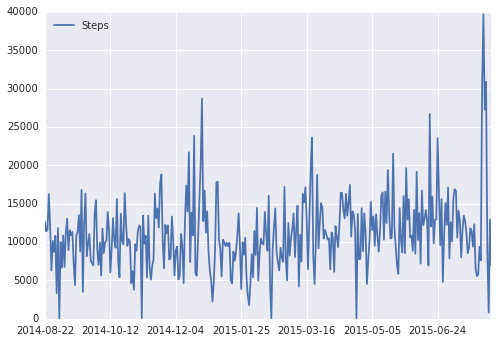

In [70]:
import matplotlib.pyplot as plt
plt.figure()
cleaned_steps.plot(label='Steps')
plt.legend(loc='best')

### Die Verteilung der Schritte
* Histogramm-Funktion von Pandas

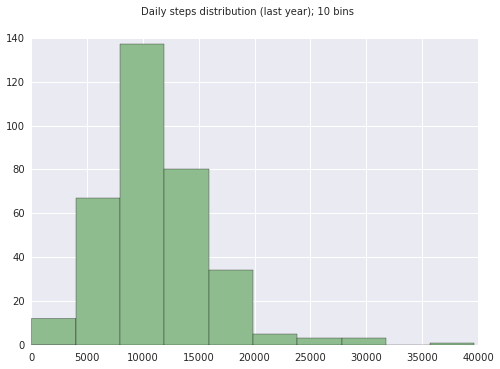

In [74]:
cleaned_steps.hist(bins=10, color='darkseagreen')
plt.suptitle('Daily steps distribution (last year); 10 bins')

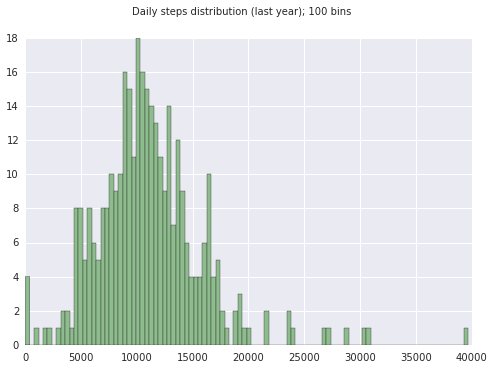

In [78]:
cleaned_steps.hist(bins=100, color='darkseagreen')
plt.suptitle('Daily steps distribution (last year); 100 bins')

## Vergleich zweier Schrittzähler

### Fitbit One vs. Microsoft Band

![Fitbit One und Microsoft Band](images/fitbit-one_microsoft-band.png)


### Daten vom Microsoft Band holen
* Der Einfachheit halber exportieren wir Daten aus Microsoft Health

### Microsoft Health Dashboard
![Microsoft Health Dashboard](images/dashboard_microsofthealth_1.png)

### Export der Daten aus Microsoft Health
![Microsoft Health Export](images/dashboard_microsofthealth_2.png)

### Einlesen der exportierten Daten
* Einlesen in ein Pandas DataFrame
* Bequeme Funktion `read_csv`

In [84]:
band_daily_summary = pd.read_csv('data/Microsoft_Health_20140821_20150821.csv', index_col='Date')

In [87]:
band_daily_summary.tail()

,Steps,Calories,HR_Lowest,HR_Highest,HR_Average,Total_Kilometers_Moved,Active_Hours,Total_Seconds_All_Activities,Total_Calories_All_Activities,Sleep_Events,...,Exercise_Events,Exercise_Total_Seconds,Exercise_Total_Calories,Guided_Workout_Events,Guided_Workout_Total_Seconds,Guided_Workout_Total_Calories,Golf_Events,Golf_Total_Seconds,Total_Kilometers_Golfed,Golf_Total_Calories
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-17,12402,2199,62,112,74,7.85174,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-18,8844,2119,62,120,76,5.52216,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-19,7862,2062,60,109,73,4.89936,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-20,8486,2106,61,100,75,5.24184,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-21,10802,2030,54,102,71,6.73544,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aufräumen der Daten
* Uns interessieren hier nur die Schritte; alles andere wegschmeissen
* Spalte mit den Schritten umbenennen

In [92]:
band_steps_summary = band_daily_summary['Steps']
band_steps = pd.DataFrame(band_steps_summary)
band_steps = band_steps.rename(columns = {'Steps':'Steps Microsoft Band'})

In [91]:
band_steps.tail()

,Steps Microsoft Band
Date,
2015-08-17,12402
2015-08-18,8844
2015-08-19,7862
2015-08-20,8486
2015-08-21,10802


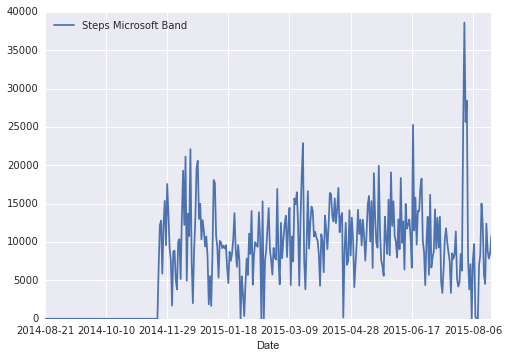

In [93]:
band_steps.plot()

### Vorbereitung des Vergleichs 
#### Daten von Fitbit in die gleiche Form bringen

In [97]:
fitbit_steps = pd.DataFrame(cleaned_steps)
#df_steps_fitbit.rename(index={0:'Date'})
fitbit_steps.index.names = ['Date']
fitbit_steps = fitbit_steps.rename(columns = {'Steps':'Steps Fitbit'})

In [99]:
fitbit_steps.tail()

,Steps Fitbit
Date,
2015-08-01,30887
2015-08-02,8857
2015-08-13,803
2015-08-14,12944
2015-08-15,7002


### Beide Tabellen in einer Tabelle (DataFrame) vereinen

In [101]:
steps_combined = pd.DataFrame.join(band_steps, fitbit_steps)

In [103]:
steps_combined.tail()

,Steps Microsoft Band,Steps Fitbit
Date,,
2015-08-17,12402,NaN
2015-08-18,8844,NaN
2015-08-19,7862,NaN
2015-08-20,8486,NaN
2015-08-21,10802,NaN


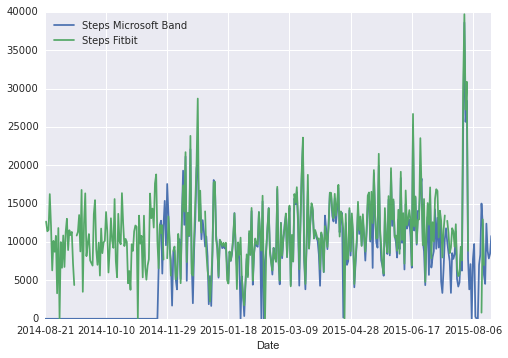

In [104]:
steps_combined.plot()

### Differenz der Schritte berechnen
* Wir erstellen eine Funktion zum Berechnen der Differenz
* Differenzen größer als 900 Schritte werden verworfern (Rückgabe `None`)
* Warum 900? Bauchgefühl; irgendwas stimmt nicht ;)

In [105]:
def differences(series):
    diff = series['Steps Microsoft Band'] - series['Steps Fitbit']
    if abs(diff) > 900:
        return None
    else:
        return diff

### Neue Spalte mit Schrittdifferenz zur Tabelle (DataFrame) hinzufügen

In [106]:
steps_combined['Difference'] = steps_combined.apply(differences, axis=1)

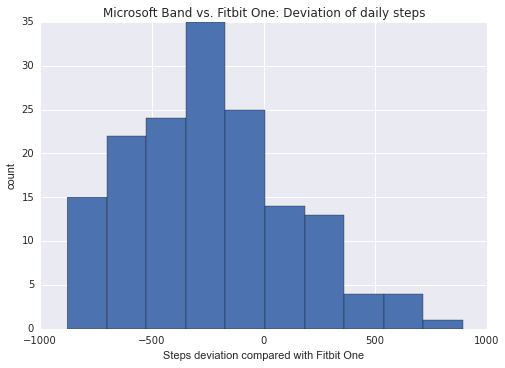

In [108]:
steps_combined['Difference'].hist(bins=10)
plt.title("Microsoft Band vs. Fitbit One: Deviation of daily steps")
plt.ylabel('count')
plt.xlabel('Steps deviation compared with Fitbit One');

### Besser als Vergleich: Prozentuale Abweichung
* Definition einer Funktion zum Ausrechnen der prozentualen Abweichung

In [109]:
def percentage(series):
    percent = 100.-100.*min(series['Steps Microsoft Band'], series['Steps Fitbit'])/max(series['Steps Microsoft Band'], series['Steps Fitbit'])
    if percent > 15.:
        return None
    else:
        return percent

### Neue Spalte mit prozentualer Abweichung zur Tabelle (DataFrame) hinzufügen

In [110]:
steps_combined['Percentage'] = steps_combined.apply(percentage, axis=1)

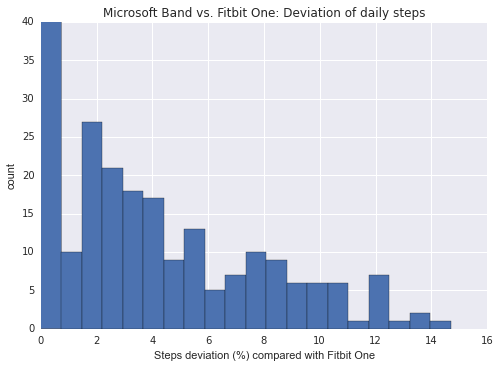

In [115]:
steps_combined['Percentage'].hist(bins=20)
plt.title("Microsoft Band vs. Fitbit One: Deviation of daily steps")
plt.ylabel('count')
plt.xlabel('Steps deviation (%) compared with Fitbit One');

In [114]:
steps_combined

,Steps Microsoft Band,Steps Fitbit,Difference,Percentage
Date,,,,
2014-08-21,0,NaN,NaN,NaN
2014-08-22,0,12673,NaN,NaN
2014-08-23,0,11408,NaN,NaN
2014-08-24,0,11585,NaN,NaN
2014-08-25,0,16252,NaN,NaN
2014-08-26,0,12152,NaN,NaN
2014-08-27,0,6309,NaN,NaN
2014-08-28,0,10156,NaN,NaN
2014-08-29,0,8732,NaN,NaN


## Muse Headband EEG

### Muse - The Brainsensing Headband
* Website: http://www.choosemuse.com/
* Developer API & SDK: https://sites.google.com/a/interaxon.ca/muse-developer-site/home

![Muse](images/muse-headband.png)

### MuseIO starten

* MuseIO empfängt Daten per Bluetooth und stellt sie per OSC-Protokoll zur Verfügung

* In das MuseIO-Installationsverzeichnis wechseln 
```
$ cd ./to/your/muse_io_path
```

* MuseIO starten 
``` 
$ muse-io --osc osc.udp://localhost:5008
```

### Bokeh
* Mal nicht Matplotlib zur Visualisierung, sondern Bokeh
* Bokeh ist eine web-basierte Visualisierungbibliothek
* http://bokeh.pydata.org

#### Bokeh Server starten
```
$ bokeh-server
```

#### Bokeh importieren

In [116]:
from bokeh.plotting import figure, output_server, output_notebook, cursession, show

### Daten vom Muse empfangen

#### Vorbereitungen

In [117]:
from liblo import *
from thread import start_new_thread

In [119]:
# Where to listen for received OSC messages by Muse IO
MUSE_IO_PORT = 5008
# Values to display (x-axis)
DISPLAY_RANGE = 1200

delta0 = 0
delta1 = 2500
delta2 = 5000
delta3 = 7500

transmission_running = False

### Bokeh vorbereiten

Using saved session configuration for http://localhost:5006/
To override, pass 'load_from_config=False' to Session



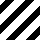
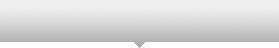
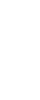
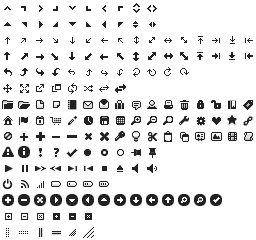
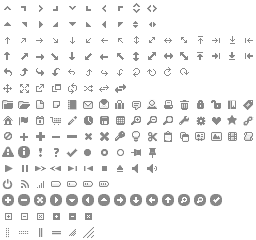
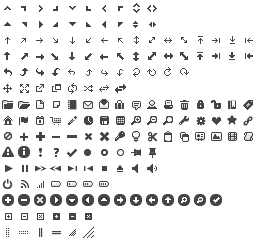
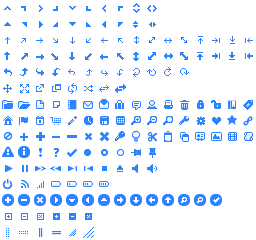
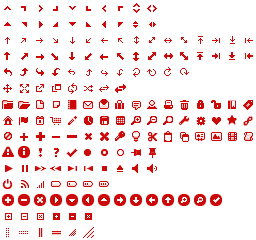
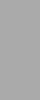
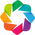
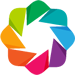
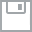
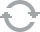
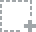
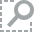
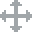
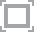
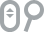

In [120]:
output_server("mindwaves")
output_notebook()

TOOLS = "wheel_zoom, box_zoom, reset, resize"

f = figure(background_fill = "#222222", tools = TOOLS)

# prevent rendering axis labels
f.xaxis.bounds = [0,0]
f.yaxis.bounds = [0,0]

# lines with DISPLAY_RANGE elements; set values to delta[0-3]
f.line(range(DISPLAY_RANGE), [delta3] * DISPLAY_RANGE, name = 'mind_wave', color = "#ef002a")
f.line(range(DISPLAY_RANGE), [delta2] * DISPLAY_RANGE, name = 'mind_wave', color = "#ff9400")
f.line(range(DISPLAY_RANGE), [delta1] * DISPLAY_RANGE, name = 'mind_wave', color = "#0b5fa5")
f.line(range(DISPLAY_RANGE), [delta0] * DISPLAY_RANGE, name = 'mind_wave', color = "#41db00")

### Lesbare Variablen für Graphen setzen

In [121]:
renderer = f.select(dict(name="mind_wave"))

l_ear_ds = renderer[0].data_source
l_forehead_ds = renderer[1].data_source
r_forehead_ds = renderer[2].data_source
r_ear_ds = renderer[3].data_source

### Muse Server mit Callback

In [122]:
class MuseServer(ServerThread):
    
    # listen for messages on MUSE_IO_PORT
    def __init__(self):
        ServerThread.__init__(self, MUSE_IO_PORT)
    
    # receive EEG data
    @make_method('/muse/eeg', 'ffff')
    def eeg_callback(self, path, args):
        global l_ear_ds, l_forehead_ds, r_forehead_ds, r_ear_ds, transmission_running
        
        l_ear, l_forehead, r_forehead, r_ear = args
        
        l_ear_ds.data["y"].append(l_ear + delta3)
        l_forehead_ds.data["y"].append(l_forehead + delta2)
        r_forehead_ds.data["y"].append(r_forehead + delta1)
        r_ear_ds.data["y"].append(r_ear + delta0) 
        
        # send data to bokeh-server only if there is no transmission running
        if (transmission_running == False):
            transmission_running = True
            start_new_thread(start_transmission_process, ())

### Parellele Datenübertragung für bessere Performance

In [124]:
def start_transmission_process():
    global l_ear_ds, l_forehead_ds, r_forehead_ds, r_ear_ds, transmission_running
    
    # only keep "some" (DISPLAY_RANGE) values
    l_ear_ds.data["y"][0:-DISPLAY_RANGE] = []  
    l_forehead_ds.data["y"][0:-DISPLAY_RANGE] = []  
    r_forehead_ds.data["y"][0:-DISPLAY_RANGE] = []  
    r_ear_ds.data["y"][0:-DISPLAY_RANGE] = [] 
    
    # send data sources to bokeh-server
    cursession().store_objects(l_ear_ds, l_forehead_ds, r_forehead_ds, r_ear_ds)
    
    # finished transmission
    transmission_running = False

### Muse Server instanziieren

In [147]:
server = MuseServer()

server error 9904: cannot find free port


### Bokeh Plot anzeigen und Server starten

In [145]:
show(f)
server.start()

In [146]:
server.stop()

# Vielen Dank!

### Wer sich für mehr interessiert...

* Python User Group Köln: http://pycologne.de

* Quantified Self Meetup Köln: http://quantifiedself.cologne

![PyCologne / QS Cologne](images/pycologne_qscologne.png)

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib
